# PyCaret 2 Clustering Example
This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [1]:
# check version
from pycaret.utils import version

version()

2.0


# 1. Loading Dataset

In [2]:
from pycaret.datasets import get_data

data = get_data("public_health")

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.134281,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.629580,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.970861,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.337347,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.566215,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448


# 2. Initialize Setup

In [3]:
from pycaret.clustering import *

clu1 = setup(
    data,
    ignore_features=["Country Name"],
    session_id=123,
    log_experiment=True,
    log_plots=True,
    experiment_name="health1",
)

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Original Data,"(224, 21)"
2,Missing Values,False
3,Numeric Features,20
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(224, 20)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


2020/08/01 15:52:36 WARNING mlflow.tracking.context.git_context: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



# 3. Create Model

In [4]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster.KMeans
ap,Affinity Propagation,sklearn.cluster.AffinityPropagation
meanshift,Mean shift Clustering,sklearn.cluster.MeanShift
sc,Spectral Clustering,sklearn.cluster.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster.AgglomerativeClustering
dbscan,Density-Based Spatial Clustering,sklearn.cluster.DBSCAN
optics,OPTICS Clustering,sklearn.cluster.OPTICS
birch,Birch Clustering,sklearn.cluster.Birch
kmodes,K-Modes Clustering,git/nicodv/kmodes


In [5]:
kmeans = create_model("kmeans", num_clusters=4)

,Metric
Silhouette,0.4335
Calinski-Harabasz,322.9575
Davies-Bouldin,0.7471


<Figure size 576x396 with 0 Axes>

In [6]:
kmodes = create_model("kmodes", num_clusters=4)

,Metric
Silhouette,-0.3632
Calinski-Harabasz,1.2468
Davies-Bouldin,1.2297


<Figure size 576x396 with 0 Axes>

# 4. Assign Labels

In [7]:
kmeans_results = assign_model(kmeans)
kmeans_results.head()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Cluster
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161,Cluster 2
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012,Cluster 2
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717,Cluster 0
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603,Cluster 2
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448,Cluster 0


# 5. Analyze Model

In [8]:
plot_model(kmeans)

In [9]:
plot_model(kmeans, feature="Country Name", label=True)

In [10]:
plot_model(kmeans, plot="tsne")

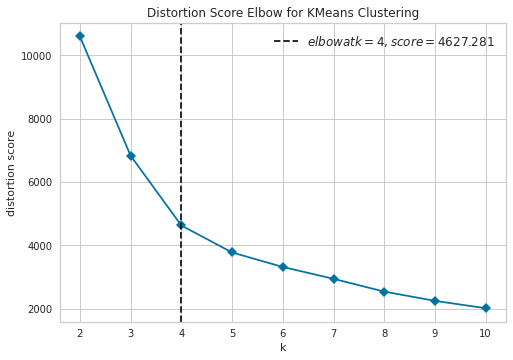

In [11]:
plot_model(kmeans, plot="elbow")

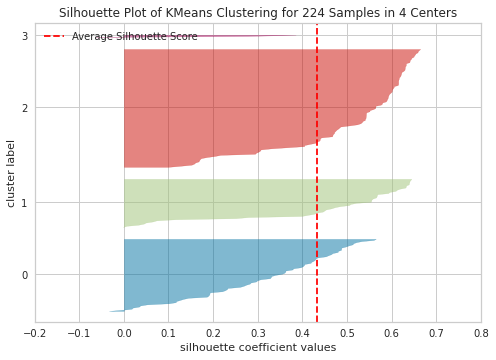

In [12]:
plot_model(kmeans, plot="silhouette")

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


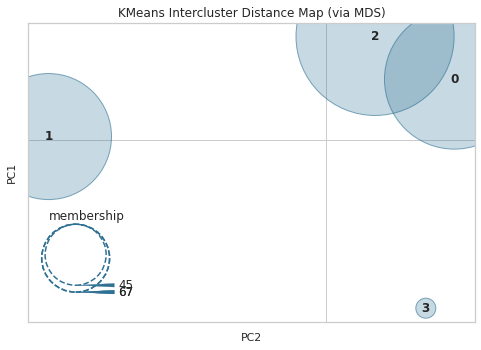

In [13]:
plot_model(kmeans, plot="distance")

In [14]:
plot_model(kmeans, plot="distribution")

# 6. Predict Model

In [15]:
pred_new = predict_model(kmeans, data=data)
pred_new.head()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Cluster
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161,Cluster 2
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012,Cluster 2
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717,Cluster 0
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603,Cluster 2
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448,Cluster 0


# 7. Save / Load Model

In [16]:
save_model(kmeans, model_name="kmeans")

Transformation Pipeline and Model Succesfully Saved


In [17]:
loaded_kmeans = load_model("kmeans")
print(loaded_kmeans)

Transformation Pipeline and Model Sucessfully Loaded
[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Country Name'],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='dummy_target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_...
                                                    target='dummy_target')),
                ('feature_time',
                 Make_Time_Features(list_of_features=None, time_feature=[])),
     

In [18]:
from sklearn import set_config

set_config(display="diagram")
loaded_kmeans[0]

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Country Name'],
                                      ml_usecase='regression',
                                      numerical_features=[],
                                      target='dummy_target',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_...
                                                    target='dummy_target')),
                ('feature_time',
                 Make_Time_Features(list_of_features=None, time_feature=[])),
                ('group', Empty()), ('scaling', Empty()),
                ('P_transform', Empty()), ('binn', Empty()),
                ('fix_perfect', Empty()), ('rem_outliers', Empty()),
                ('dummy', Dummify(target='dummy_target')),
                ('clean_names', Clean_Colum_Names()), ('fix_multi', Empty()),
                ('pca', Empty())],
         verbose=False)

In [19]:
from sklearn import set_config

set_config(display="text")

# 8. Deploy Model

In [21]:
# deploy_model(kmeans, model_name="kmeans-aws", authentication={"bucket": "pycaret-test"})

# 9. Get Config / Set Config

In [22]:
X = get_config("X")
X.head()

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=X)
INFO:logs:Global variable: X returned
INFO:logs:get_config() succesfully completed......................................


,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,2.314914,2.134281,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161
1,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,2.845971,2.629580,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012
2,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,4.913629,4.970861,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717
3,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,2.346824,2.337347,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603
4,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,4.626696,4.566215,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448


In [23]:
get_config("seed")

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=seed)
INFO:logs:Global variable: seed returned
INFO:logs:get_config() succesfully completed......................................


123

In [24]:
from pycaret.clustering import set_config

set_config("seed", 999)

INFO:logs:Initializing set_config()
INFO:logs:set_config(variable=seed, value=999)
INFO:logs:Global variable:  seed updated
INFO:logs:set_config() succesfully completed......................................


In [25]:
get_config("seed")

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=seed)
INFO:logs:Global variable: seed returned
INFO:logs:get_config() succesfully completed......................................


999

# 10. MLFlow UI

In [26]:
# !mlflow ui

# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org